In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

plt.rcParams["figure.figsize"] = (16,8)

# Visualization

In [2]:
def taskplot(x, y, r, verbose=True):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(min(x)-2, max(x)+2)
    ax.set_ylim(min(y)-2, max(y)+2)

    plt.scatter(x, y, marker='+')
    text_opt = dict(textcoords='offset pixels', ha='center')

    for i, (cx, cy, cr) in enumerate(zip(x, y, r)):
        circle = plt.Circle((cx, cy), cr, color='black', fill=False)
        ax.add_artist(circle)
        if verbose:
            if i == 0:
                ax.annotate('Position', (cx, cy), xytext=(0, -20), **text_opt)
            elif i < len(x) - 1:
                ax.annotate(f'TP{i}', (cx, cy), xytext=(0, 10), **text_opt)
            else:
                ax.annotate(f'Goal', (cx, cy), xytext=(0, 10), **text_opt)
    
    fig.tight_layout()
    return fig, ax

def optplot(t, x, y, r, verbose=True):
    angles = [f'{np.degrees(theta):.2f}' for theta in t]

    # Compute optimized points from angles
    x_p = x + r*np.sin(t)
    y_p = y + r*np.cos(t)
    dists = np.sqrt(np.power(np.diff(x_p), 2) + np.power(np.diff(y_p), 2))
    
    fig, ax = taskplot(x, y, r, verbose)
    ax.scatter(x, y, marker='+')
    ax.plot(x_p, y_p, ls='--')
                
    ax.annotate(f'Total distance : {dists.sum():.2f}', xy=(0.05, 0.9), xycoords='axes fraction')
    return fig, ax

# Task distance function, with angles

In [3]:
def tasklen(θ, x, y, r):
    x_proj = x + r*np.sin(θ)
    y_proj = y + r*np.cos(θ)

    dists = np.sqrt(np.power(np.diff(x_proj), 2) + np.power(np.diff(y_proj), 2))

    return dists.sum()

# Test cases

(<Figure size 1152x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f25fda1aca0>)

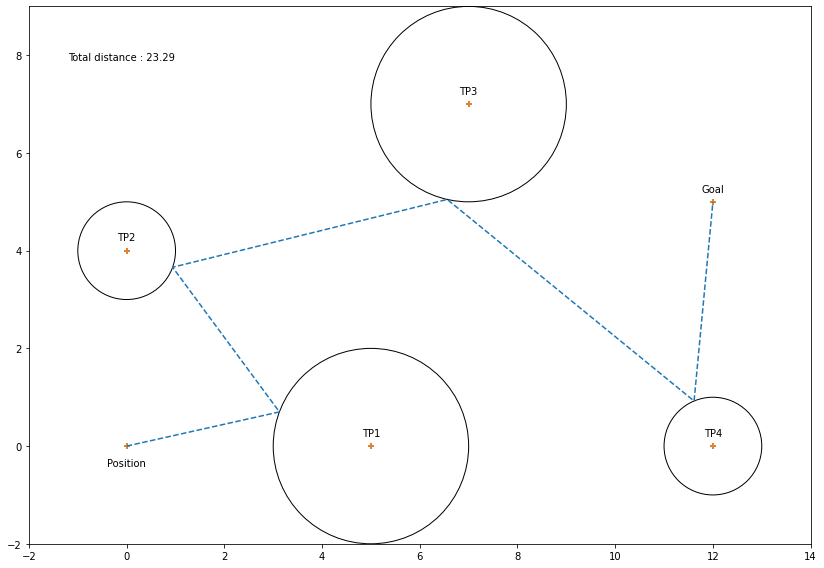

In [18]:
def task_simple():
    X = np.array([0, 5, 0, 7, 12, 12]).astype(float)
    Y = np.array([0, 0, 4, 7, 0, 5]).astype(float)
    R = np.array([0, 2, 1, 2, 1, 0]).astype(float)
    return X, Y, R

def task_concentric():
    X = np.array([0, 10, 10, 10, 15, 2]).astype(float)
    Y = np.array([0, 10, 10, 10, 2, 0]).astype(float)
    R = np.array([0, 2, 10, 5, 1, 0]).astype(float)
    return X, Y, R

def task_aligned():
    X = np.array([0, 8, 16, 24, 32, 40]).astype(float)
    Y = np.array([0, 5, 10, -10, 2, 0]).astype(float)
    R = np.array([0, 3, 2, 5, 1, 0]).astype(float)

X, Y, R = task_simple()
init_vector = np.zeros(R.shape).astype(float)
result = minimize(tasklen, init_vector, args=(X, Y, R), tol=10e-5)
optplot(result.x, X, Y, R)

In [20]:
np.degrees(result.x)

array([   0.        ,  -69.5231018 ,  109.84275496, -167.32151098,
        -22.68005044,    0.        ])

# dev

In [ ]:
def project(X, Y, R)

In [17]:
def optimize(X, Y, R):
    while X.size:
        nxidx = X.size-1
        pos = X[0], Y[0]
        nxpos = X[nxidx], Y[nxidx]
        

X, Y, R = task_simple()
result = optimize(X, Y, R)
optplot(result, X, Y, R)

KeyboardInterrupt: 